In [480]:
import os
import time
import json
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [481]:
# with open('final_output.json', 'r') as file:
#     results = json.load(file)
    
# with open('final_output_part2__.json', 'r') as file:
#     results = json.load(file)  

# with open('final_output_llm-gpt35.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_human_gpt4.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_llm_gpt4.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_GPT35_human_fewshot.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_GPT35_llm_fewshot.json', 'r') as file:
#     results = json.load(file)
    
# with open('final_output_GPT4_human_fewshot.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_GPT4_llm_fewshot.json', 'r') as file:
#     results = json.load(file)

# with open('3final_output_GPT35_human_cot.json', 'r') as file:
#     results = json.load(file)

# with open('2final_output_GPT35_llm_cot.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_GPT4_llm_cot.json', 'r') as file:
#     results = json.load(file)

# with open('final_output_GPT4_human_cot.json', 'r') as file:
#     results = json.load(file)

with open('explanation_cot_prediction_GPT35_human.json', 'r') as file:
    results = json.load(file)

# with open('explanation_cot_prediction_GPT35_llm.json', 'r') as file:
#     results = json.load(file)

In [482]:
# results

In [483]:
len(results)

1200

In [484]:
type(results)

list

In [485]:
ground_truth = []
prediction = []
scores = []
ctr = 0

In [486]:
for item in results:
    ground_truth.append(item['ground truth'])
    prediction.append(int(1) if item['prediction'] == 'True' else int(0))
    try:
        scores.append(item['scores'])
    except KeyError:
        print(item)
        continue
    
    ctr+=1
#     if 
#     break

{'news': 'RNA vaccines, commonly known as mRNA vaccines, actually contain modified RNA (modRNA) that genetically manipulates healthy human cells. This modRNA is used instead of mRNA because it is more stable and less likely to be destroyed by the immune system. However, there are concerns about the potential genetic alteration of the human genome and the creation of antibody-dependent enhancement (ADE) as side effects. The attachment of the viral spike protein to healthy cells can lead to immune degradation and interfere with proper cell metabolism. Additionally, RNA vaccines only provide protection against specific strains of COVID-19 and lack cross-immunity to other strains or variants. Natural immunity acquired through exposure to the virus offers broader protection. The use of modRNA in vaccines raises concerns about long-term effects and potential risks.', 'evidence list': ['kylz5i8s', '231aovh8', '18olzzhg'], 'ground truth': 0, 'prediction': '\nFalse\n\n##reason##\n1. Alignment: 

In [487]:
len(prediction)

1200

In [488]:
ctr

636

In [489]:
len(scores)

636

In [490]:
scores[0]

{'Alignment': -1,
 'Causation Confusion': -1,
 'Accuracy': -1,
 'Generalization': -1,
 'Contextual Fidelity': -1}

In [491]:
accuracy = []
alignment = []
causation_confusion = []
generalization = []
contextual_fidelity = []
values = []

for score in scores:
    alignment.append(score['Alignment'])
    causation_confusion.append(score['Causation Confusion'])
    accuracy.append(score['Accuracy'])
    generalization.append(score['Generalization'])
    contextual_fidelity.append(score['Contextual Fidelity'])
    values.append([score['Alignment'], score['Causation Confusion'], score['Accuracy'], score['Generalization'], score['Contextual Fidelity']])

In [492]:
len(values)

636

In [493]:
len(prediction)

1200

In [494]:
acc = accuracy_score(ground_truth, prediction)
print(f"Accuracy Score is : {acc:.2%}")

Accuracy Score is : 63.08%


In [495]:
f1 = f1_score(ground_truth, prediction, average='binary')
print(f"F1 Score is : {f1:.2%}")

F1 Score is : 44.69%


In [496]:
prec = precision_score(ground_truth,prediction)
print(f"Precision Score is : {prec:.2%}")

Precision Score is : 89.05%


In [497]:
rec = recall_score(ground_truth, prediction)
print(f"Recall Score is : {rec:.2%}")

Recall Score is : 29.83%


In [504]:
tt = [] # true positives
tf = [] # false negatives
ft = [] # false positives
ff = [] # true negatives

In [505]:
for item in results:
    try:
#         scores.append(item['scores'])
        gt = (item['ground truth'])
        p = (int(1) if item['prediction'] == 'True' else int(0))
        if gt == 1 & p == 1:
            tt.append(item['scores'])
        elif gt == 1 & p == 0:
            tf.append(item['scores'])
        elif gt == 0 & p == 1:
            ft.append(item['scores'])
        elif gt == 0 & p == 0:
            ff.append(item['scores'])
    
    except KeyError:
        continue
    
#     break

In [506]:
values1 = []
values2 = []
values3 = []
values4 = []

for score in tt:
    values1.append([score['Alignment'], score['Causation Confusion'], score['Accuracy'], score['Generalization'], score['Contextual Fidelity']])

for score in tf:
    values2.append([score['Alignment'], score['Causation Confusion'], score['Accuracy'], score['Generalization'], score['Contextual Fidelity']])
    
for score in ft:
    values3.append([score['Alignment'], score['Causation Confusion'], score['Accuracy'], score['Generalization'], score['Contextual Fidelity']])
    
for score in ff:
    values4.append([score['Alignment'], score['Causation Confusion'], score['Accuracy'], score['Generalization'], score['Contextual Fidelity']])

In [507]:
# values1 = np.mean(values1, axis=0).tolist()
# values2 = np.mean(values2, axis=0).tolist()
# # values3 = np.mean(values3, axis=0).tolist()
# values4 = np.mean(values4, axis=0).tolist()

In [508]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Step 1: Define the data
categories = ['Alignment', 'Causation confusion', 'Accuracy', 'Generalization', 'Contextual Fidelity']

N = len(categories)

In [509]:
# Step 2: What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

if values1:
    values1 = np.mean(values1, axis=0).tolist()
    values1 += values1[:1]
if values2:
    values2 = np.mean(values2, axis=0).tolist()
    values2 += values2[:1]
if values3:
    values3 = np.mean(values3, axis=0)
    values3 += values3[:1]
if values4:
    values4 = np.mean(values4, axis=0).tolist()
    values4 += values4[:1]

angles += angles[:1]

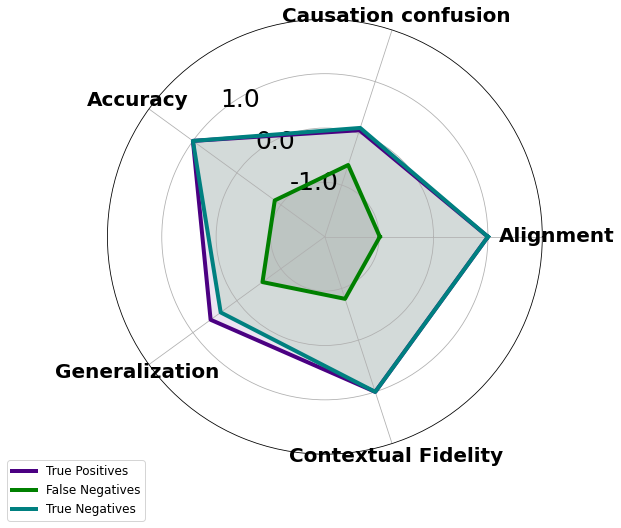

In [510]:
# Step 3: Initialise the spider plot
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('none')

# Step 4: Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', weight='bold', size=20)

# Step 5: Draw ylabels
ax.set_rlabel_position(130)
plt.yticks([-1.0, 0.0, 1.0], ["-1.0", "0.0", "1.0"], color="black", size=25)
plt.ylim(-2.0,2.0)

# Step 6: Plot data
if values1:
    ax.plot(angles, values1, linewidth=4, linestyle='solid', color='indigo', label='True Positives')
    ax.fill(angles, values1, 'indigo', alpha=0.1)

if values2:
    ax.plot(angles, values2, linewidth=4, linestyle='solid', color='g', label='False Negatives')
    ax.fill(angles, values2, 'k', alpha=0.1)

if values3:
    ax.plot(angles, values3, linewidth=4, linestyle='solid', color='magenta', label='False Positives')
    ax.fill(angles, values3, 'm', alpha=0.1)

if values4:
    ax.plot(angles, values4, linewidth=4, linestyle='solid', color='teal', label='True Negatives')
    ax.fill(angles, values4, 'g', alpha=0.1)

# Step 7: Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.0), fontsize='large')

# plt.savefig('explanation_cot_sif_llm.png')
plt.savefig('explanation_cot_sif_human.png')

plt.show()